In [8]:
import numpy as np
import pandas as pd


In [9]:
df=pd.read_csv('placement.csv')
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [10]:
df = df.iloc[:,1:]
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


In [11]:
import matplotlib.pyplot as plt


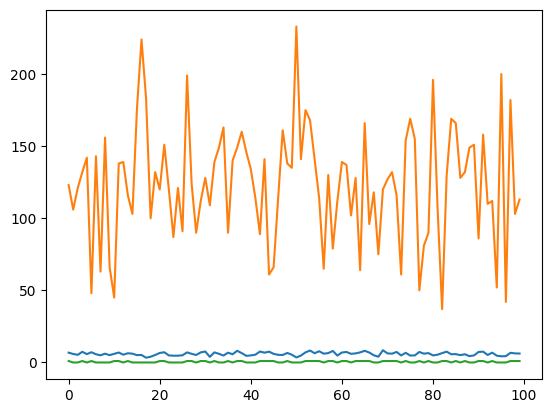

In [12]:
plt.plot(df)

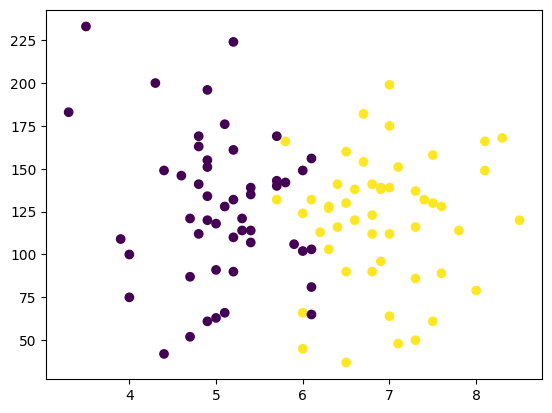

In [13]:
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])


In [14]:
x = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [15]:
x

,cgpa,iq
0,6.8,123.0
1,5.9,106.0
2,5.3,121.0
3,7.4,132.0
4,5.8,142.0
...,...,...
95,4.3,200.0
96,4.4,42.0
97,6.7,182.0
98,6.3,103.0


In [16]:
y

,placement
0,1
1,0
2,0
3,1
4,0
...,...
95,0
96,0
97,1
98,1


In [17]:
y.shape

(100,)

In [18]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.1)

In [19]:
xtrain

,cgpa,iq
30,7.6,128.0
4,5.8,142.0
32,7.0,139.0
45,6.0,66.0
57,6.5,130.0
...,...,...
33,6.0,149.0
81,5.4,107.0
44,7.5,61.0
65,8.1,166.0


In [20]:
ytrain

,placement
30,1
4,0
32,1
45,1
57,1
...,...
33,0
81,0
44,1
65,1


In [21]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
xtrain = sc.fit_transform(xtrain)


In [22]:
xtrain

array([[ 1.40151378,  0.09684291],
       [-0.19852309,  0.45573135],
       [ 0.86816816,  0.37882668],
       [-0.02074122, -1.49252016],
       [ 0.42371347,  0.14811269],
       [ 0.86816816,  1.91691997],
       [-1.08743247,  0.994064  ],
       [ 0.51260441, -0.10823619],
       [-0.28741403,  0.48136623],
       [-0.99854153,  0.78898489],
       [ 0.33482253,  0.43009646],
       [-1.44299622, -2.10775747],
       [ 1.40151378, -0.90291773],
       [ 2.20153222, -0.10823619],
       [ 0.06814972, -0.54402929],
       [ 1.13484097,  0.3275569 ],
       [-0.90965059, -0.85164795],
       [ 1.84596847,  0.63517556],
       [ 0.69038628, -0.03133153],
       [ 0.42371347, -2.23593192],
       [ 0.06814972,  0.19938246],
       [-0.55408684, -0.26204552],
       [-0.55408684,  0.27628713],
       [ 1.13484097, -0.97982239],
       [-1.08743247,  1.14787333],
       [ 0.69038628, -0.87728284],
       [ 0.86816816,  1.30168266],
       [ 0.77927722,  0.35319179],
       [-0.73186872,

In [23]:
xtest = sc.transform(xtest)

In [24]:
xtest

array([[-0.99854153, -1.6206946 ],
       [ 0.33482253, -0.21077575],
       [-2.42079653,  1.50676176],
       [ 0.06814972, -1.10799683],
       [-1.53188716,  1.94255486],
       [-0.73186872, -0.36458508],
       [ 1.31262284,  0.86588956],
       [ 0.24593159, -0.54402929],
       [-0.02074122, -0.56966418],
       [ 0.86816816, -1.54378993]])

In [25]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(xtrain,ytrain)

LogisticRegression()

In [26]:
xpred = model.predict(xtest)

In [27]:
ytest

,placement
73,0
13,1
17,0
78,0
95,0
92,0
91,1
98,1
62,0
64,1


In [28]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest,xpred)

0.8

<Axes: >

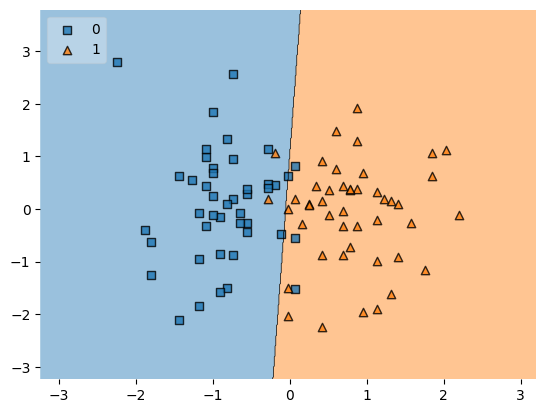

In [29]:
from mlxtend.plotting import plot_decision_regions

plot_decision_regions(xtrain,ytrain.values,clf=model, legend=2)

In [30]:
import pickle
pickle.dump(model,open('model.pkl','wb'))